In [1]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
upload=files.upload()

Saving bank-full.csv to bank-full.csv


In [24]:
data=pd.read_csv('bank-full.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
data=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
#data_cleaned=pd.get_dummies(data,columns=['default'])
data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [6]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.055717,-0.044002,0.021792,...,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816,-0.025155,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.026726,-0.048757,0.009642,...,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271,-0.052838,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.010455,-0.022898,-0.002312,...,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256,0.028348,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.015722,0.009637,-0.001327,...,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491,-0.394521,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.021868,0.008986,0.002128,...,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965,0.073172,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.027497,0.020063,-0.014203,...,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962,-0.103621,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.014245,-0.017095,-0.008181,...,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763,-0.093236,0.093236
job_admin.,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,1.000000,-0.188216,-0.066273,...,0.026657,-0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,-0.025940,-0.005637,0.005637
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.188216,1.000000,-0.096585,...,0.165448,-0.048027,-0.042410,-0.044816,0.002254,0.001342,-0.053074,0.022194,0.072083,-0.072083
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.066273,-0.096585,1.000000,...,-0.009908,0.051017,-0.012012,-0.007769,0.001119,-0.013506,-0.019111,0.014901,0.019662,-0.019662


In [7]:
data.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


<Axes: >

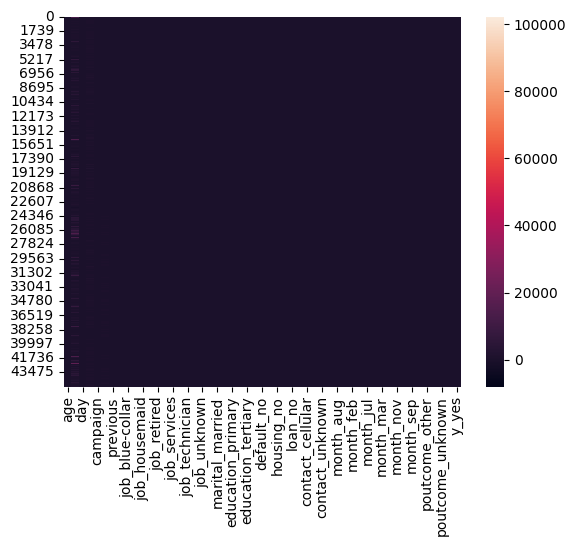

In [8]:
import seaborn as sns
sns.heatmap(data=data)

<ipython-input-9-3ab0dfd2f715>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y_yes'])


<Axes: xlabel='y_yes', ylabel='Density'>

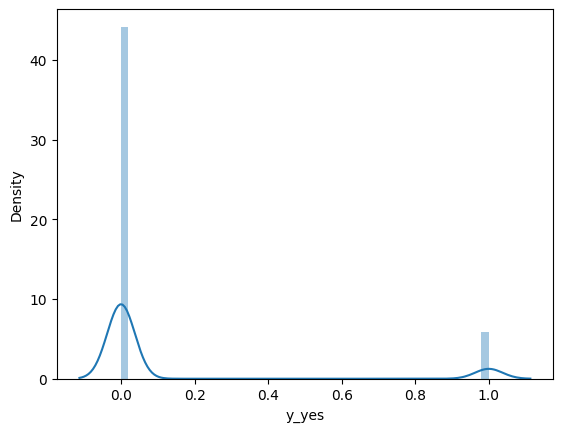

In [9]:
import matplotlib.pyplot as plt
sns.distplot(data['y_yes'])

purely a left-skewed data


In [10]:
data=data.rename(columns={'job_admin.':'job_admin'})
#data='job_admin'.strip('.')

In [11]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [12]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [13]:
data.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_admin              uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknow

In [14]:
data.count()

age                    45211
balance                45211
day                    45211
duration               45211
campaign               45211
pdays                  45211
previous               45211
job_admin              45211
job_blue-collar        45211
job_entrepreneur       45211
job_housemaid          45211
job_management         45211
job_retired            45211
job_self-employed      45211
job_services           45211
job_student            45211
job_technician         45211
job_unemployed         45211
job_unknown            45211
marital_divorced       45211
marital_married        45211
marital_single         45211
education_primary      45211
education_secondary    45211
education_tertiary     45211
education_unknown      45211
default_no             45211
default_yes            45211
housing_no             45211
housing_yes            45211
loan_no                45211
loan_yes               45211
contact_cellular       45211
contact_telephone      45211
contact_unknow

In [15]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [35]:
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred=regressor.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
y_pred_df=pd.DataFrame({'Actual':y,'Predictions':y_pred})
y_pred_df

,Actual,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [20]:
from sklearn.metrics import confusion_matrix,r2_score
confusion_matrix(y,y_pred)

array([[39504,   418],
       [ 1333,  3956]])

In [21]:
accuracy_manual=(39504+3956)/(39504+3956+418+1333)

In [22]:
print(accuracy_manual)

0.9612704872707969


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39922
           1       0.90      0.75      0.82      5289

    accuracy                           0.96     45211
   macro avg       0.94      0.87      0.90     45211
weighted avg       0.96      0.96      0.96     45211



ROC **CURVE**

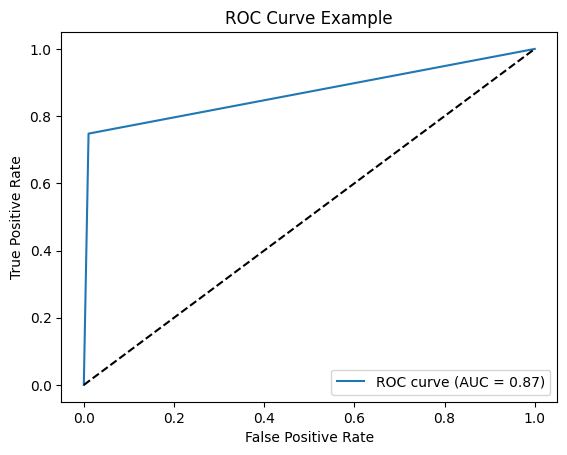

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Assume y_true and y_pred are the true labels and predicted probabilities of a test set
fpr, tpr, thresholds = roc_curve(y, y_pred) #Calculate FPR, TPR and thresholds
auc = roc_auc_score(y, y_pred) #Calculate the area under the curve (AUC)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc) #Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--') #Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Example')
plt.legend(loc='lower right')
plt.show() #Show the plot

#LABEL ENCODER()

In [25]:
data1=data
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
data1.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


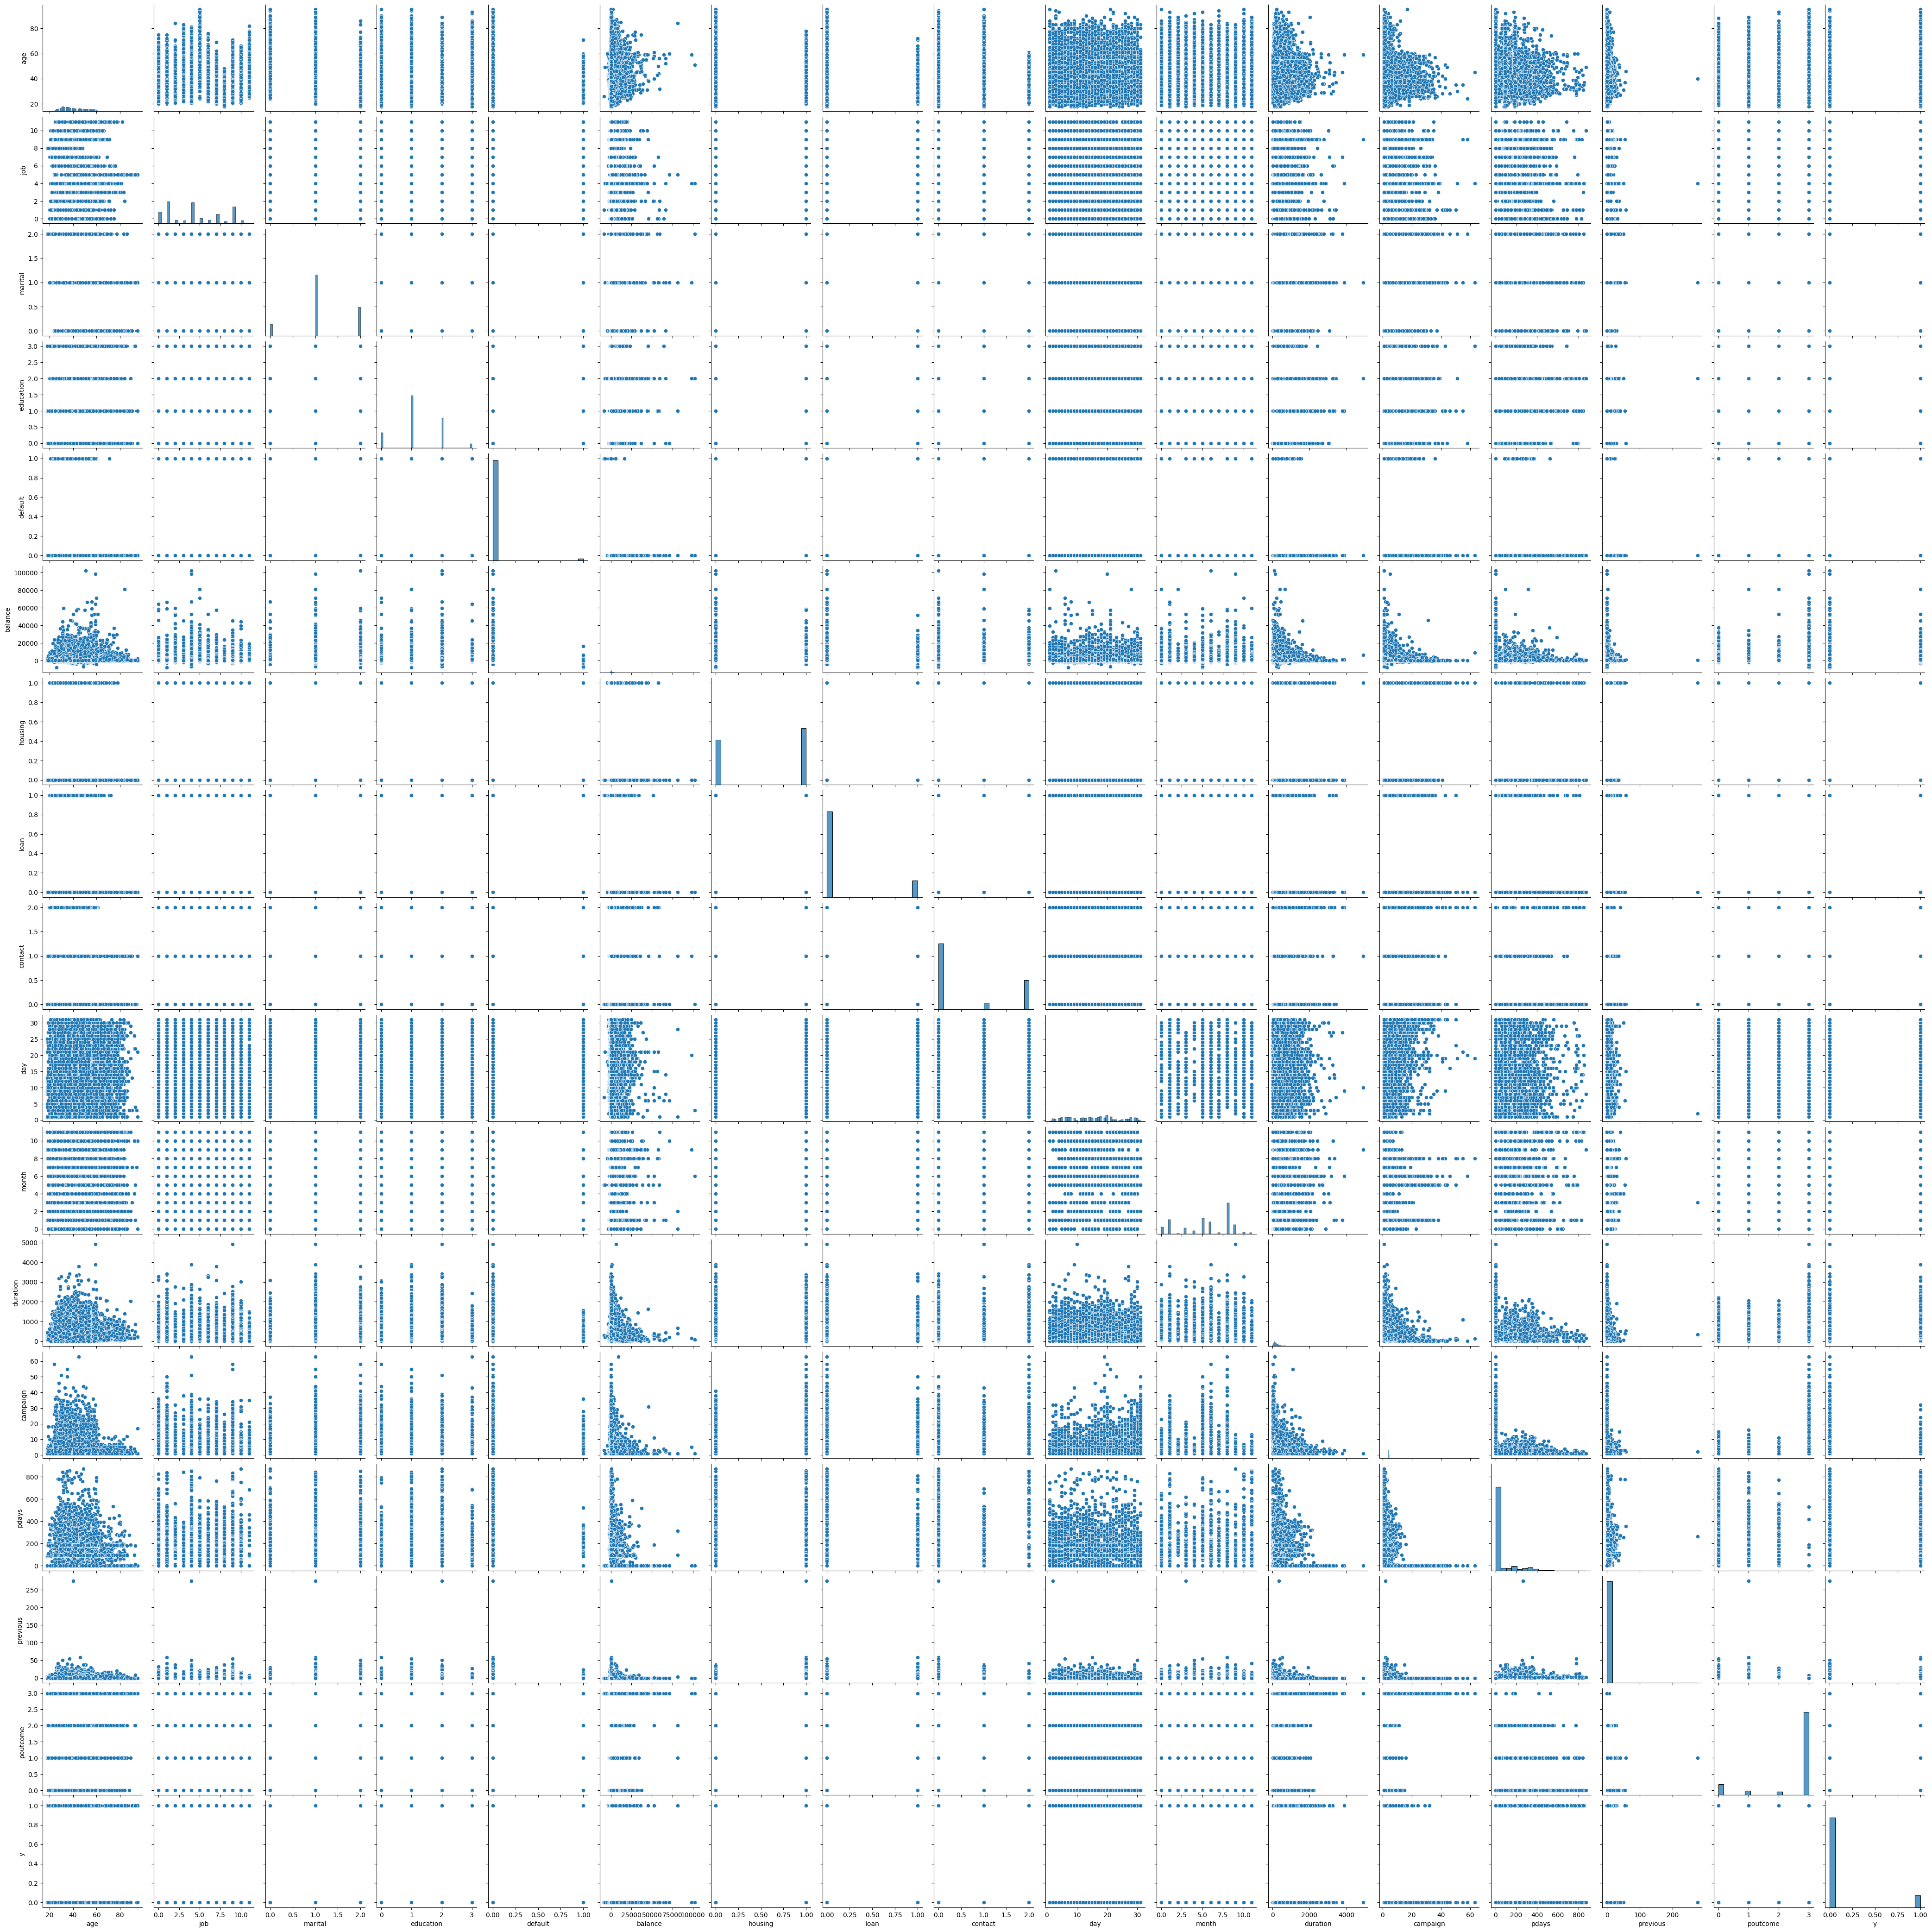

In [57]:
import seaborn as sns
sns.pairplot(data1)

In [26]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()

In [28]:
#data1['job','marital','education','default','housing','loan','contact','month','poutcome','y']=LabelEncoder().fit_transform(data1.loc[:,['job','marital','education','default','housing','loan','contact','month','poutcome','y']],axis=1)
#data1['job','marital','education','default','housing','loan','contact','month','poutcome','y']=LabelEncoder().fit_transform(x)
data1['job']=scaler.fit_transform(data1['job'])
data1['marital']=scaler.fit_transform(data1['marital'])
data1['education']=scaler.fit_transform(data1['education'])
data1['default']=scaler.fit_transform(data1['default'])
data1['housing']=scaler.fit_transform(data1['housing'])
data1['loan']=scaler.fit_transform(data1['loan'])
data1['contact']=scaler.fit_transform(data1['contact'])
data1['month']=scaler.fit_transform(data1['month'])
data1['poutcome']=scaler.fit_transform(data1['poutcome'])
data1['y']=scaler.fit_transform(data1['y'])

In [29]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x=data1.iloc[:,:-1]
y=data.iloc[:,-1]
x



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10000)

In [42]:
regressor=LogisticRegression()
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred=regressor.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
y_pred_df=pd.DataFrame({'Actual':y,"Prediction":y_pred})
y_pred_df

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y,y_pred)

array([[39214,   708],
       [ 4386,   903]])

In [49]:
accuracy_score(y,y_pred)

0.8873283050585035

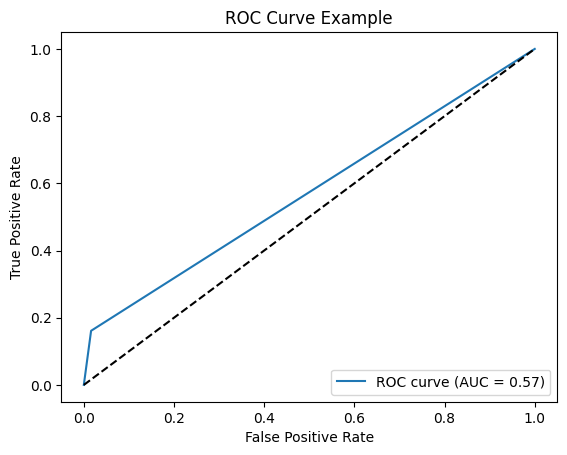

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Assume y_true and y_pred are the true labels and predicted probabilities of a test set
fpr, tpr, thresholds = roc_curve(y, y_pred) #Calculate FPR, TPR and thresholds
auc = roc_auc_score(y, y_pred) #Calculate the area under the curve (AUC)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc) #Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--') #Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Example')
plt.legend(loc='lower right')
plt.show() #Show the plot

# **other way to find the accuarcy is by grid searchCV **

In [29]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,10,20,30,40,50],'max_iter':[100,200,300]}


In [30]:
regressor_regression=GridSearchCV(regressor,param_grid=parameters,scoring='accuracy',cv=5)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
regressor_regression.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [33]:
print(regressor_regression.best_params_)

{'C': 50, 'max_iter': 300, 'penalty': 'l2'}


In [34]:
print(regressor_regression.best_score_)

0.9993917076147893


In [35]:
y_pred_test=regressor_regression.predict(x_test)

In [36]:
y_pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [37]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred_test,y_test)

0.9911533783036602

**Here the accuacy for the model is 99% which is far better than the first model**

In [38]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8002
           1       0.95      0.97      0.96      1041

    accuracy                           0.99      9043
   macro avg       0.97      0.98      0.98      9043
weighted avg       0.99      0.99      0.99      9043

